In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

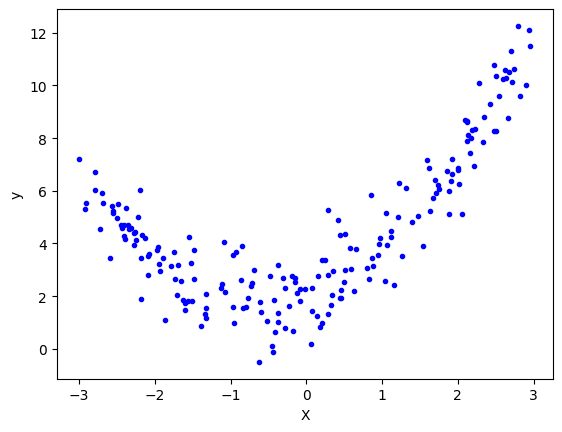

In [7]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [8]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
# Applying linear regression
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)


0.3291762101495722

Text(0, 0.5, 'y')

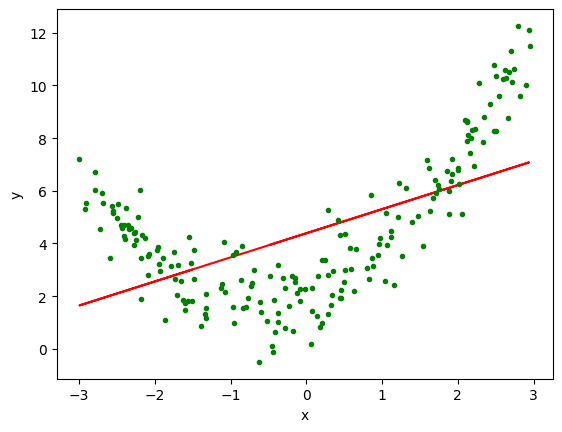

In [13]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'g.')
plt.xlabel('x')
plt.ylabel('y')

In [15]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [16]:
print(X_train[0])
print(X_train_trans[0])

[-0.47785308]
[ 1.         -0.47785308  0.22834357]


In [17]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)


LinearRegression()

In [18]:
y_pred = lr.predict(X_test_trans)

In [19]:
r2_score(y_test,y_pred)

0.8885639227613992

In [20]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.95084384 0.79930721]]
[2.06587116]


In [21]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

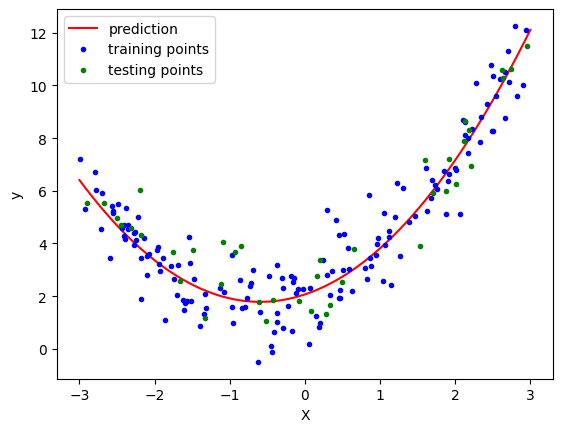

In [23]:
plt.plot(X_new,y_new,'r-',label='prediction')
plt.plot(X_train,y_train,'b.',label='training points')
plt.plot(X_test,y_test,'g.',label='testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [24]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

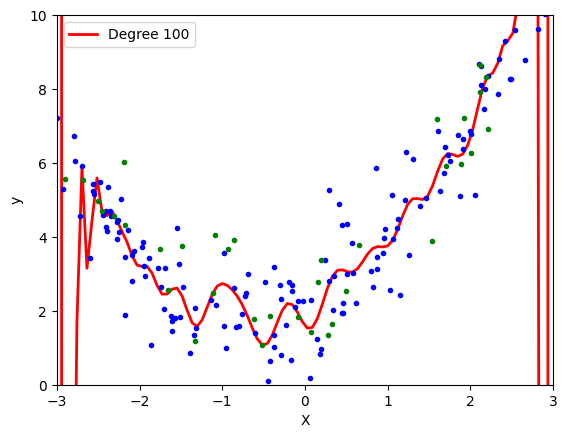

In [28]:
polynomial_regression(100)

In [29]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

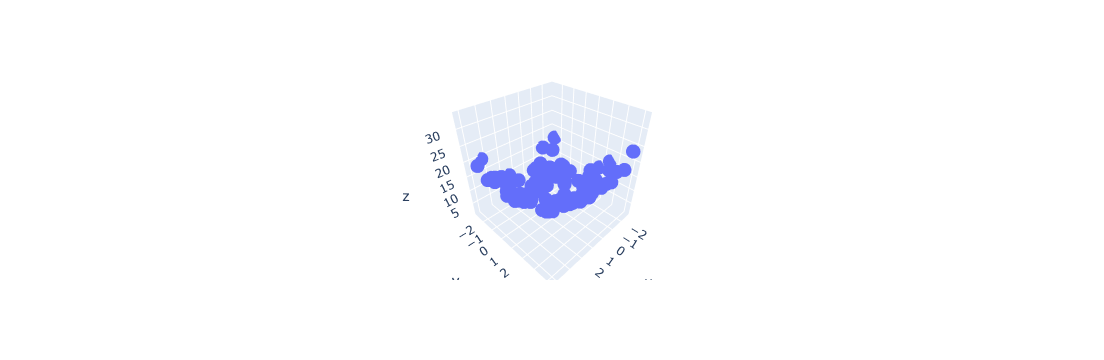

In [30]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [31]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

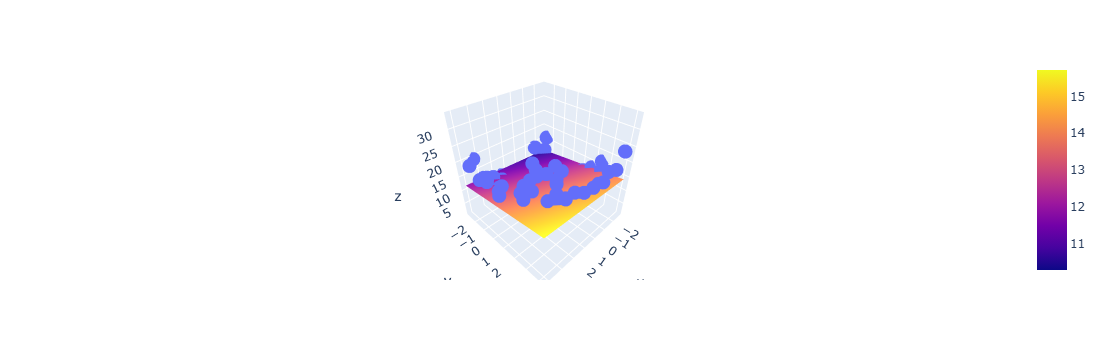

In [32]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()


In [33]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [34]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [36]:
#print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [37]:
X_multi_trans.shape

(100, 6)

In [38]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [39]:
X_test_multi = poly.transform(final)

In [40]:
z_final = lr.predict(X_multi_trans).reshape(10,10)


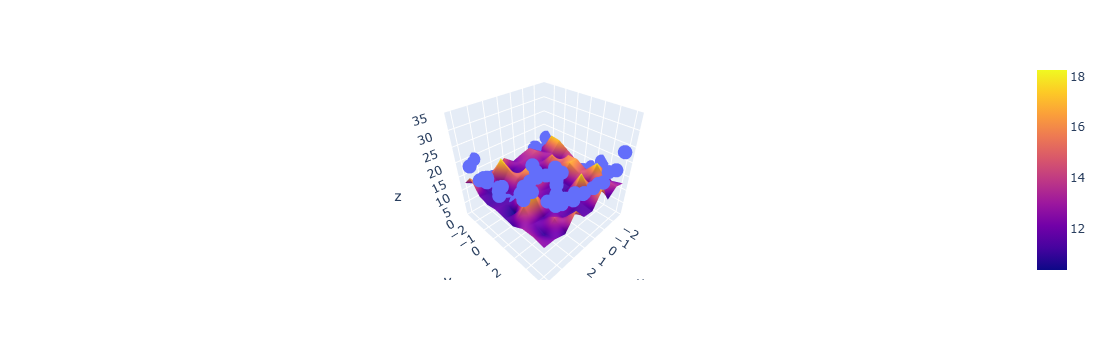

In [41]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()